# AIPI 590 - XAI | Assignment
### Mechanistic Interpretability
### Ayush Gupta

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/10Olg2PTN1YBRvUO3ZmdSXko7KP8wymN3#scrollTo=XyOdG9plSW7H)

In [2]:
!pip install sentence-transformers umap-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
sentences = [
    # Animal
    "The lion roared across the savannah.",
    "Penguins huddle together to stay warm.",
    "The elephant used its trunk to grab food.",
    "Dolphins are known for their intelligence.",
    "The owl hooted in the quiet forest night.",
    "Tigers stalk their prey silently in the jungle.",
    "The panda munches on bamboo peacefully.",
    "A herd of deer ran through the open field.",
    "The chameleon changed color to blend in.",
    "Parrots can mimic human speech remarkably well.",
    # Music
    "She strummed the guitar by the campfire.",
    "Classical symphonies often include string quartets.",
    "He blasted rock music through his headphones.",
    "Jazz musicians improvise during live shows.",
    "The violinist played a haunting solo.",
    "Electronic music is popular in nightclubs.",
    "They formed a garage band in high school.",
    "The music festival featured artists from around the world.",
    "She downloaded a playlist of 90s hits.",
    "Opera singers project their voice without microphones.",
    # AI
    "AI is revolutionizing the healthcare industry.",
    "Self-driving cars rely on computer vision algorithms.",
    "Deep learning models require large datasets to train.",
    "Robots are used in modern assembly lines.",
    "Facial recognition is widely used in smartphones.",
    "Natural language processing powers chatbots.",
    "Voice assistants like Alexa and Siri use AI.",
    "Cybersecurity tools now incorporate machine learning.",
    "Autonomous drones use real-time data for navigation.",
    "Generative AI can produce images from text descriptions.",
    # Sports
    "Soccer is the most watched sport globally.",
    "He trained daily to qualify for the marathon.",
    "The basketball bounced off the rim.",
    "Cricket matches can last for days in test format.",
    "She set a new record in the 100-meter sprint.",
    "The tennis match went into a fifth set.",
    "Fans cheered loudly as the goal was scored.",
    "He wore cleats for better traction on the field.",
    "Gymnasts require incredible flexibility and strength.",
    "The referee blew the whistle for a foul.",
    # Food
    "She ordered a pepperoni pizza for dinner.",
    "Sushi is made with vinegared rice and raw fish.",
    "Freshly baked bread smells amazing.",
    "He added chili flakes to make it spicy.",
    "Indian curries are rich in spices and flavor.",
    "She enjoys drinking herbal tea every evening.",
    "The chef garnished the dish with parsley.",
    "Chocolate cake is her favorite dessert.",
    "They harvested fresh vegetables from the garden.",
    "Avocados are a key ingredient in guacamole.",
]

labels = (
    ["Animal"] * 10 + ["Music"] * 10 + ["AI"] * 10 + ["Sports"] * 10 + ["Food"] * 10
)


# Examples generated by ChatGPT

Model like all-MiniLM-L6-v2, which is featured on MTEB leaderboard. We will be visualizing its embeddings with t-SNE, PCA, and UMAP

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(sentences)

# source: https://www.sbert.net/

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(embeddings)

# source: https://umap-learn.readthedocs.io/en/latest/

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


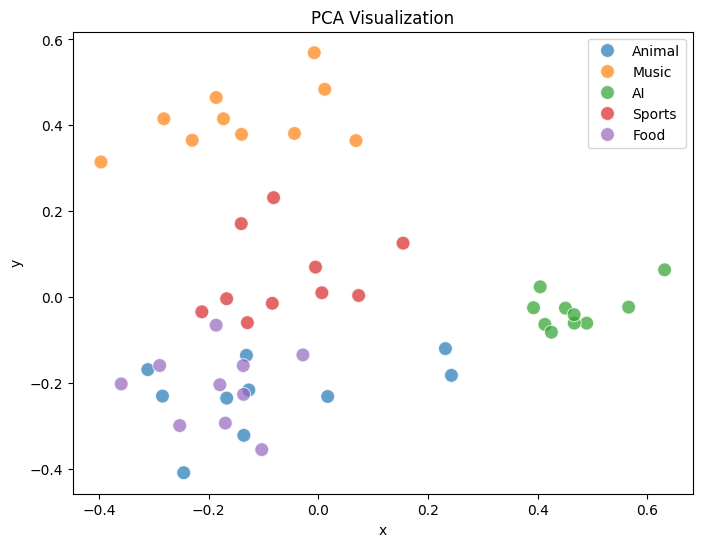

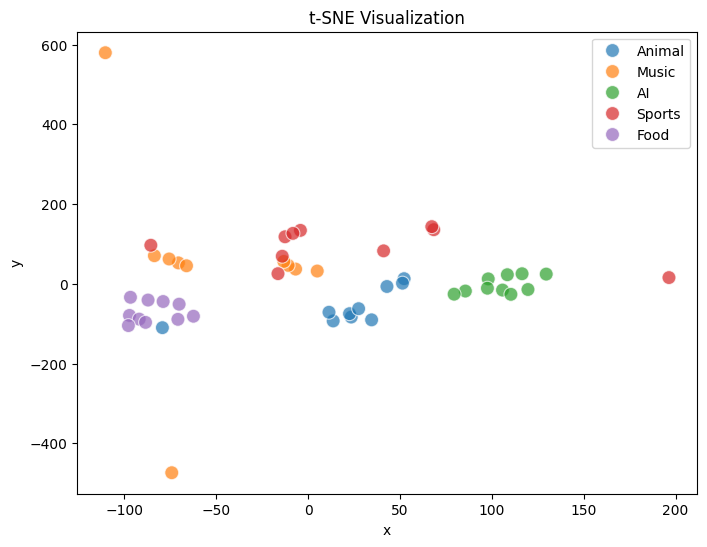

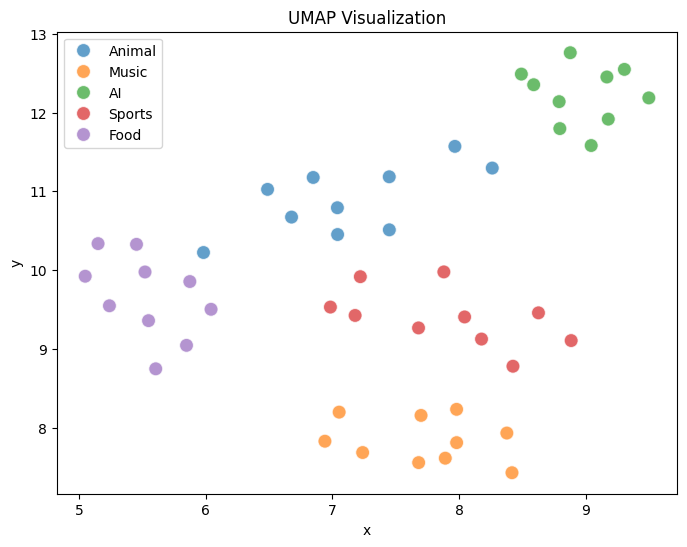

In [23]:
def plot_2d(data, labels, title):
    df = pd.DataFrame(data, columns=["x", "y"])
    df["label"] = labels
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="x", y="y", hue="label", data=df, s=100, alpha=0.7)
    plt.title(title)
    plt.legend()
    plt.show()


plot_2d(pca_result, labels, "PCA Visualization")
plot_2d(tsne_result, labels, "t-SNE Visualization")
plot_2d(umap_result, labels, "UMAP Visualization")

---

### 7. 📊 Comparison & Discussion (with 50 sentences)

| Aspect                     | PCA Visualization                            | t-SNE Visualization                             | UMAP Visualization                                |
|---------------------------|-----------------------------------------------|--------------------------------------------------|---------------------------------------------------|
| **Semantic Clustering**   | Moderate clustering. Some categories (e.g., AI) are clearly grouped, while others (e.g., Sports and Food) show overlap. | Strong clustering. Most categories are separated well with minor outliers. | Excellent clustering. All five categories are distinctly grouped and well-separated. |
| **Clarity of Separation** | Lower clarity due to linear projection. Some groups blend. | High clarity. t-SNE exaggerates separation, which improves interpretability. | Very high clarity. Groups are well-formed with meaningful spacing. |
| **Runtime Efficiency**    | Fastest (linear method). Near-instant.         | Slower (especially with higher data size).       | Faster than t-SNE but slower than PCA. Scales well with more data. |
| **Interpretability**      | High interpretability due to use of principal components. | Less interpretable due to non-linear nature.     | Medium interpretability, but better structural preservation. |
| **Structure Preservation**| Preserves global variance but not local neighborhoods well. | Great for local structure, poor for global.      | Preserves both local and global structure well.   |

---



### 8. 🧠 Summary of Results

- **Patterns Revealed:**
  - Sentence embeddings captured distinct topic-based semantics quite well.
  - With 10 examples per category, the visual separation of sentence clusters became much clearer.
  - AI, Music, and Animal sentences consistently formed strong, distinct clusters.

- **Most Insightful Method:**
  - **UMAP** was the most effective at preserving both **category-level separation** and **internal structure** within each group.
  - **t-SNE** provided very strong visual separation and compact clusters, although it showed a few outliers.
  - **PCA**, while fast and interpretable, showed some blending between semantically close categories like Sports and Food.

- **Interesting Observations:**
  - UMAP maintained both semantic similarity and meaningful spacing between different topics, revealing nuanced relationships.
  - AI-related sentences formed one of the tightest and most distinguishable clusters across all techniques — possibly due to the model's strong understanding of technical language.
  - PCA’s limitation in linear projection was evident as cluster boundaries were less distinct, showing the value of non-linear XAI methods in embedding interpretation.

---
